In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
volume             float64
issue              float64
publisher           object
weight              object
indexed_keyword     object
inverted_index      object
dtype: object

# Hypotheses 1:
> Papers that cite more references tend to receive more citations themselves.

- Null Hypotheses(H0): There is no correlation between the number of references cited by a paper and the number of citations it receives.
- Alternative Hypothesis(H₁): There is a positive correlation between the number of references cited by a paper and the number of citations it receives.

### We will be using the **pearson correlation coefficient test** as both variables (reference count & n_citation) are continuous (float) variables

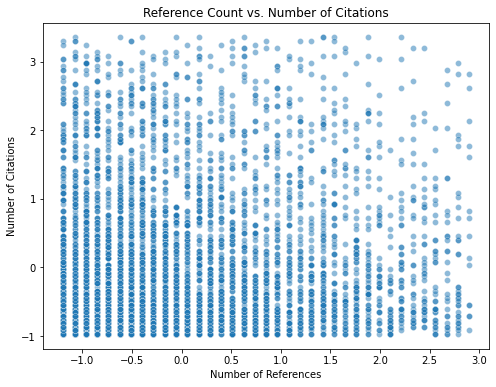

Pearson Correlation Coefficient: 0.0794
P-value: 2.9166e-09
Reject the null hypothesis: There is a significant positive correlation b/w number of references and number of citations.


In [14]:
# Ensure the sample has the necessary columns and no missing values
df = df[['reference_count', 'n_citation']].dropna()

# normalize both the columns
df['reference_count'] = (df['reference_count'] - df['reference_count'].mean()) / df['reference_count'].std()
df['n_citation'] = (df['n_citation'] - df['n_citation'].mean()) / df['n_citation'].std()


# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='reference_count', y='n_citation', alpha=0.5)
plt.title('Reference Count vs. Number of Citations')
plt.xlabel('Number of References')
plt.ylabel('Number of Citations')
plt.show()

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['reference_count'], df['n_citation'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation b/w number of references and number of citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found.")

Thus, As the number of references increase, the number of citations also increase!